# Homework: 

using Newton-Raphson method to solve above equation arrays. 

Hint: first you need to derive the partical derivative of the equation arrays. You can do it either analytically by hand or numerically using method we learned in the last lecture.

## Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

Note: if do derivatives numerically, an example of small number dx = 1e-6

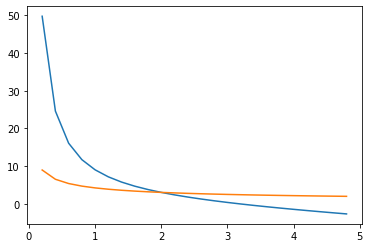

In [47]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return (10.-x*x)/x  # = x2 

def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x

## Draw graphics to roughly determine x1 and x2

pltx = np.arange(0.2, 5, .2)

plt.plot(pltx, f1(pltx))
plt.plot(pltx, f2(pltx))

In [50]:
import matplotlib.pyplot as plt
import numpy as np


def f1(x1,x2):
    return (x1*x1+x1*x2-10.)

def f2(x1,x2):
    return (x2+3*x1*x2*x2-57)

def f1x1(x1,x2): #a
    return (2*x1+x2)

def f1x2(x1,x2): #b
    return x1
    
def f2x1(x1,x2): #c
    return 3*x2**2
    
def f2x2(x1,x2): #d 
    return (1+6*x1*x2)
    
def dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2): # find correction: delta x1 
    #return ( x1*(x2 + 3*x1*x2**2 -57) - (1 - 6*x1*x2) ) / ( (2*x1+x2)*(1+6*x1*x2) - 3*x1*x2**2 )
    return ( f1x2(x1, x2)*f2(x1, x2) - f2x2(x1, x2)*f1(x1, x2) )/(f1x1(x1, x2)*f2x2(x1, x2) - f1x2(x1, x2)*f2x1(x1, x2) )
    
def dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2): # find correction: delta x2
    #return (x1*(x2+3*x1*x2**2-57) - 1 - 6*x1*x2) / ( (2*x1+x2)*(1+6*x1*x2) - 3*x1*x2**2 )
    return (f2x1(x1, x2)*f1(x1, x2)-f1x1(x1, x2)*f2(x1, x2))/(f1x1(x1, x2)*f2x2(x1, x2)-f1x2(x1, x2)*f2x1(x1, x2))

In [53]:
def nr(x10, x20, nmax, eps, f1, f2): 
    for i in range(0, nmax):
        x10 = x10 + dx1(f1, f2, f1x1, f1x2, f2x1, f2x2, x10, x20)
        x20 = x20 + dx2(f1, f2, f1x1, f1x2, f2x1, f2x2, x10, x20)
        if(abs(f1(x10, x20))<eps and f2(x10,x20)<eps):
            print("Solution is at x1=",x10, ", x2=", x20, " after ",i," iterations, with a precision of",abs(f1(x10, x20)))
            break
    return (x10, x20)

x1 = 1.
x2 = 2.

eps = 1e-6
nmax = 100 

sol = nr(x1, x2, nmax, eps, f1, f2)

Solution is at x1= 1.9999999999990041 , x2= 3.0000000000105147  after  3  iterations, with a precision of 1.4058088027013582e-11
